In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 41.2 MB/s eta 0:00:0000:0100:01


In [12]:
import pandas as pd
import xgboost as xgb
#from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Cargar los datos
df = pd.read_csv("assets/GeneracionFiltrado.csv")

In [5]:
df.head()

,Fecha,Generacion,Temperatura,Irradiancia,Unnamed: 4
0,14/12/2021,24563.88,26.25769,453.39563,NaN
1,15/12/2021,21248.28,24.77586,328.47131,NaN
2,16/12/2021,15536.70,24.20414,235.20594,NaN
3,17/12/2021,14679.72,24.15448,216.43154,NaN
4,18/12/2021,14434.92,22.51034,206.39489,NaN


In [6]:
# Preprocesamiento simple (ejemplo)

X = df.drop(columns=['Generacion', 'Fecha', 'Unnamed: 4'])
y = df['Generacion']


In [7]:
X.head()

,Temperatura,Irradiancia
0,26.25769,453.39563
1,24.77586,328.47131
2,24.20414,235.20594
3,24.15448,216.43154
4,22.51034,206.39489


In [8]:
y.head()

0    24563.88
1    21248.28
2    15536.70
3    14679.72
4    14434.92
Name: Generacion, dtype: float64

In [60]:

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:

# Convertir datos a DMatrix y especificar GPU
dtrain = xgb.DMatrix(X_train, label=y_train, nthread=-1)
dtest = xgb.DMatrix(X_test, label=y_test, nthread=-1)

# Entrenar directamente con xgb.train (más controlado)
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'device': 'cuda',
    'eval_metric': 'rmse'
}

start_gpu = time.time()
booster = xgb.train(params, dtrain, num_boost_round=100)
print(f"GPU time: {time.time() - start_gpu:.2f} seconds")



GPU time: 0.13 seconds


In [62]:
# Predicción
y_pred = booster.predict(dtest)

In [19]:
print(y_pred[:10])

[23699.715 25615.742 26538.37  28909.896 16188.314 18157.438 11377.127
 23975.328 22592.564 12482.941]


In [63]:
# Evaluación

import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 2683.769985315096
R² Score: 0.7617757919413093


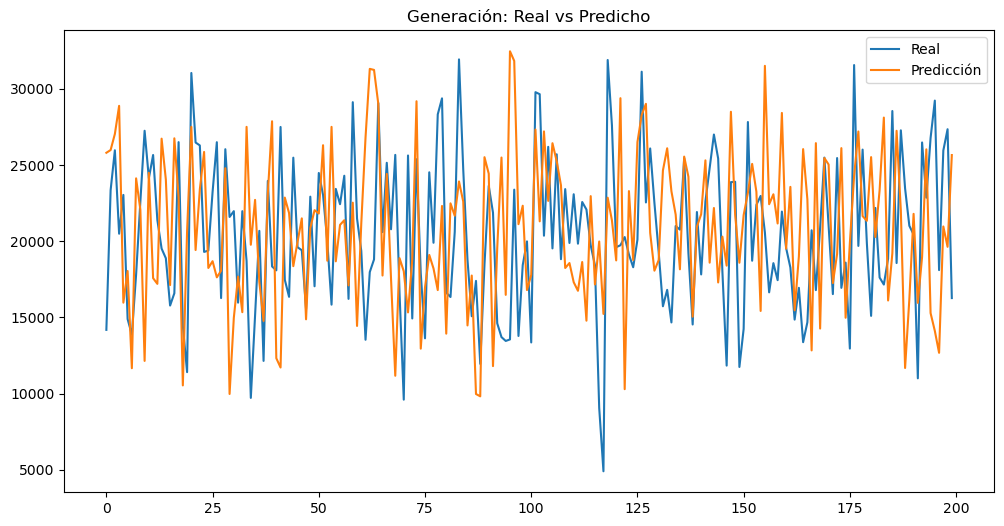

In [64]:
import matplotlib.pyplot as plt

# Graficamos
plt.figure(figsize=(12, 6))
plt.plot(np.array(y_train[:200]), label='Real')
plt.plot(y_pred[:200], label='Predicción')
plt.legend()
plt.title("Generación: Real vs Predicho")
plt.show()

In [13]:
import time
# Iniciar temporizador
start_gpu = time.time()

# Entrenar modelo XGBoost con GPU
modelo = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    tree_method='hist',  # Usa histograma (recomendado para GPU)
    device='cuda'        # Especifica que se use la GPU
)

modelo.fit(X_train, y_train)

# Medir tiempo de entrenamiento
print(f"GPU time: {time.time() - start_gpu:.2f} seconds")

GPU time: 0.43 seconds
